## Satellite Image Classification

### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from  tensorflow import keras
from skimage.transform import resize
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

### Fetch the Training data

In [2]:
cloudy=glob('cloudy/*.jpg')[:1000]
desert=glob('desert/*.jpg')[:1000]
green_area=glob('green_area/*.jpg')[:1000]
water=glob('water/*.jpg')[:1000]

### Find the number of images of all classes in the Training set

In [3]:
print('Number of Images in Classes :')
print(f'cloudy:{len(cloudy)}')
print(f'desert:{len(desert)}')
print(f'green_area:{len(green_area)}')
print(f'water:{len(water)}')

Number of Images in Classes :
cloudy:1000
desert:1000
green_area:1000
water:1000


### Store all the images inside a list and create a list with the corresponding labels

In [4]:
images=[]
labels=[]
for i in cloudy:
    img=plt.imread(i)
    images.append(img)
    labels.append(1)
    
for i in desert:
    img=plt.imread(i)
    images.append(img)
    labels.append(2)
    
for i in green_area:
    img=plt.imread(i)
    images.append(img)
    labels.append(3)
    
for i in water:
    img=plt.imread(i)
    images.append(img)
    labels.append(4)

### plot some images

In [5]:
label={1:'cloudy',2:'desert',3:'green_area',4:'water'}

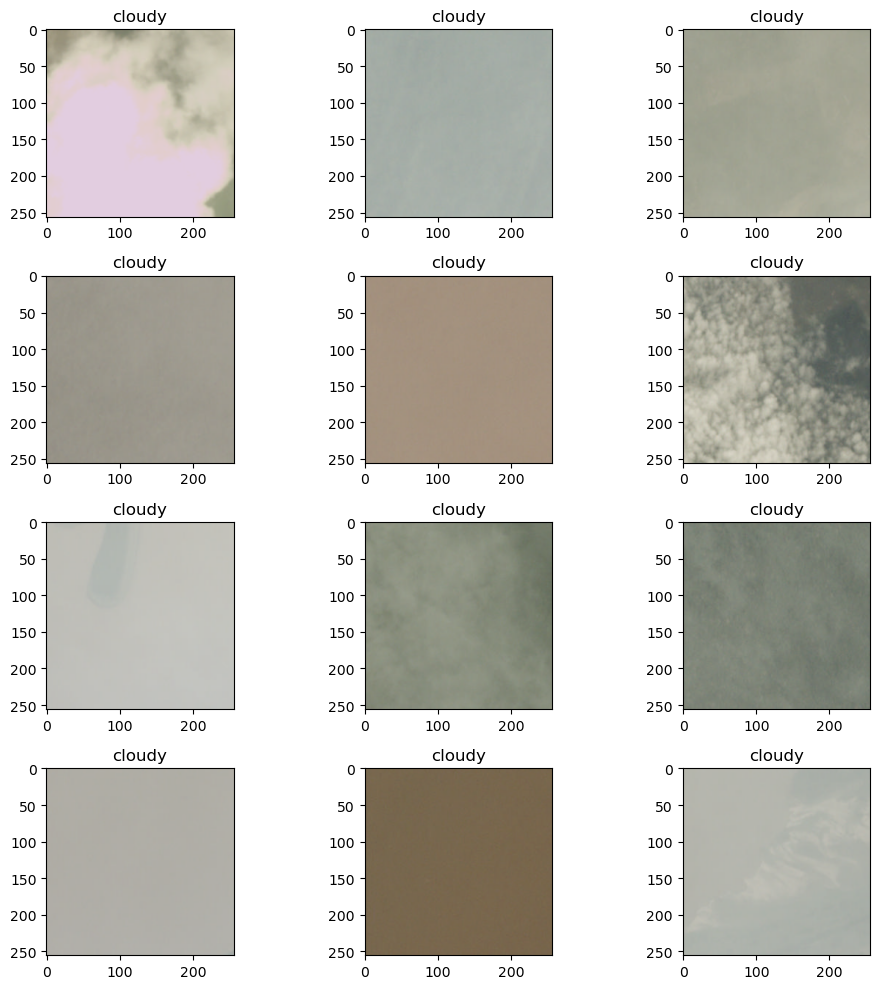

In [6]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(images[i])
    plt.title(label[labels[i]])
plt.tight_layout()

### Shuffle both image list and label list (In both Training and testing set)

In [7]:
images , labels = shuffle(images,labels)

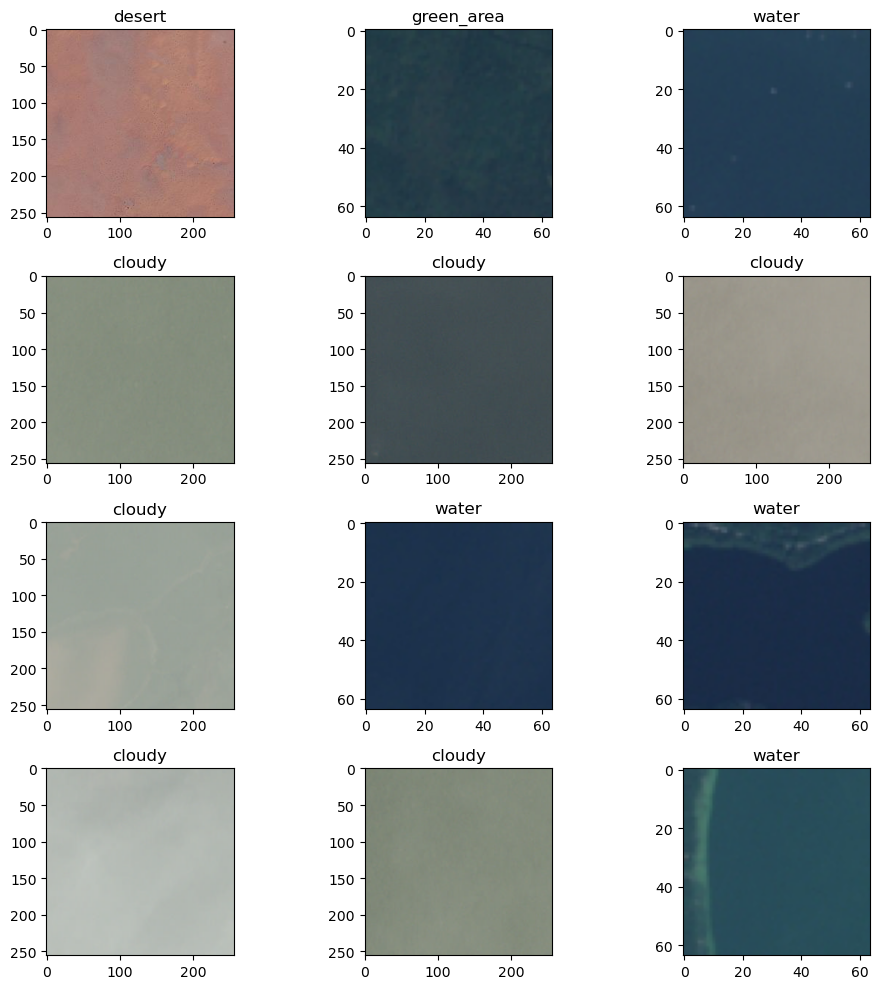

In [8]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(images[i])
    plt.title(label[labels[i]])
plt.tight_layout()

### Check the shape of the first 10 images in our list (Either from training or test set)

In [9]:
for i in range(10):
    print(images[i].shape)

(256, 256, 3)
(64, 64, 3)
(64, 64, 3)
(256, 256, 4)
(256, 256, 4)
(256, 256, 4)
(256, 256, 4)
(64, 64, 3)
(64, 64, 3)
(256, 256, 4)


### Reshape the images to 64x64( For both training and testing set)

Also reassign them to new variables named X_train and  convert them to a numpy array

In [18]:
x=[]
for i in images:
    x.append(resize(i,(64,64,3)))
x=np.array(x)


### Plot some of our reshaped images

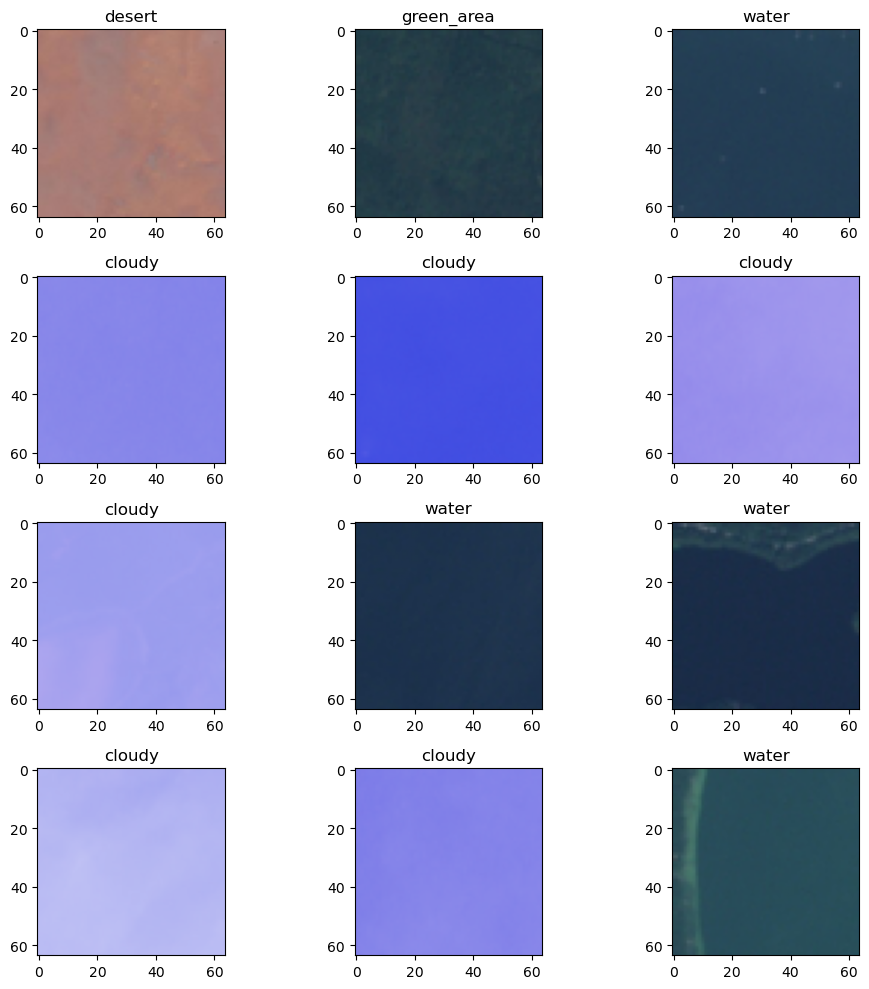

In [19]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(x[i])
    plt.title(label[labels[i]])
plt.tight_layout()

### Split into input and target variable

In [20]:
y=np.array(labels)

### Split the Dataset into train,test,split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Create a keras Sequential model with convolution layers, Flatten and  Hidden layers

In [22]:
model=keras.models.Sequential([
    keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(64,64,3)),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(64,64,3)),
    keras.layers.MaxPool2D(),
    
    
    keras.layers.Flatten(),
    keras.layers.Dense(5,activation='sigmoid'),
    keras.layers.Dense(5,activation='sigmoid')
                
])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 5)                

### Compile the model

In [24]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Train the model. 


In [25]:
model.fit(x_train,y_train,epochs=10,validation_split=0.05)

Epoch 1/10
95/95 [==============================] - 16s 152ms/step - loss: 1.1503 - accuracy: 0.6582 - val_loss: 1.0043 - val_accuracy: 0.7875
Epoch 2/10
95/95 [==============================] - 14s 150ms/step - loss: 0.9469 - accuracy: 0.7743 - val_loss: 0.9097 - val_accuracy: 0.8625
Epoch 3/10
95/95 [==============================] - 15s 160ms/step - loss: 0.8460 - accuracy: 0.8500 - val_loss: 0.8034 - val_accuracy: 0.8875
Epoch 4/10
95/95 [==============================] - 16s 173ms/step - loss: 0.7559 - accuracy: 0.8967 - val_loss: 0.7305 - val_accuracy: 0.9312
Epoch 5/10
95/95 [==============================] - 14s 152ms/step - loss: 0.6766 - accuracy: 0.9201 - val_loss: 0.6578 - val_accuracy: 0.9312
Epoch 6/10
95/95 [==============================] - 14s 151ms/step - loss: 0.6634 - accuracy: 0.8773 - val_loss: 0.6560 - val_accuracy: 0.9062
Epoch 7/10
95/95 [==============================] - 15s 162ms/step - loss: 0.5858 - accuracy: 0.9155 - val_loss: 0.5620 - val_accuracy: 0.9312

### Evaluate the model

In [26]:
model.evaluate(x_train,y_train)

100/100 [==============================] - 4s 37ms/step - loss: 0.4467 - accuracy: 0.9397


[0.44666141271591187, 0.9396874904632568]

### Make predictions with X_test

In [27]:
y_pred=model.predict(x_test)

25/25 [==============================] - 1s 42ms/step


### Use np.argmax to fetch indices of max element of the array

In [28]:
y_pred=[np.argmax(i) for i in y_pred]

### check accuracy of the dataset

In [29]:
accuracy_score(y_test,y_pred)

0.9475

### Visualise confusion matrix on a heatmap

<Axes: >

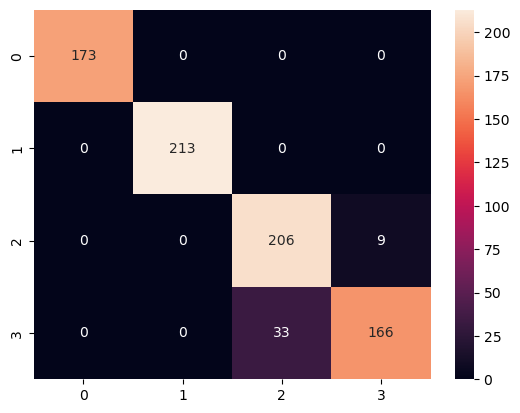

In [30]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### print classification report

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       173
           2       1.00      1.00      1.00       213
           3       0.86      0.96      0.91       215
           4       0.95      0.83      0.89       199

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.95      0.95      0.95       800

